In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 데이터 준비
* 각 변수의 의미 파악
* 각 변수의 데이터 유형
* 각 변수의 분포와 특성 파악
* 결측치/이상치 파악
* 집값 예측을 위한 후보변수 선택

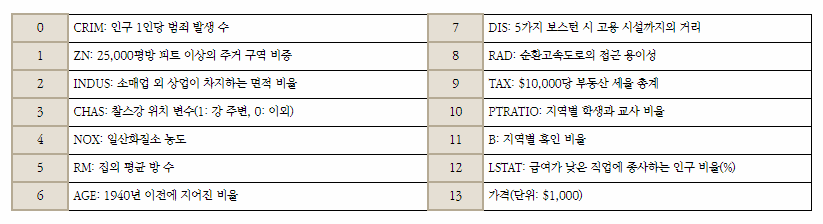

In [2]:
df = pd.read_csv('data/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 데이터 탐색

In [3]:
# 데이터 타입, 결측치 확인

# 데이터 타입 확인
print(df.dtypes)

# 결측치 확인
print(df.isnull().sum())

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


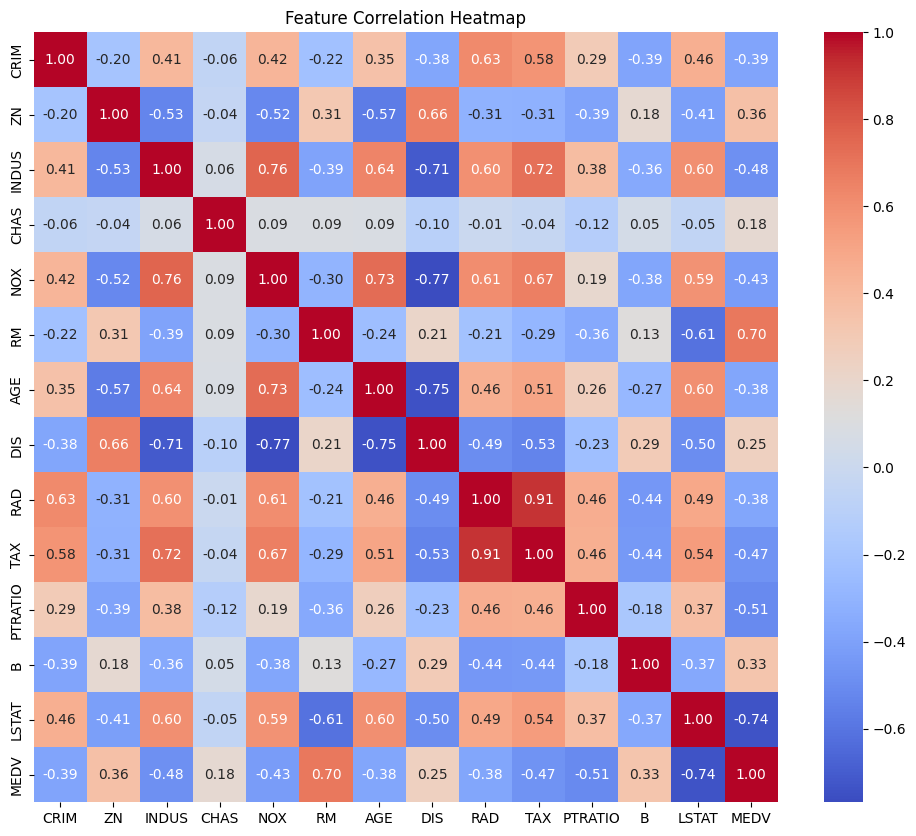

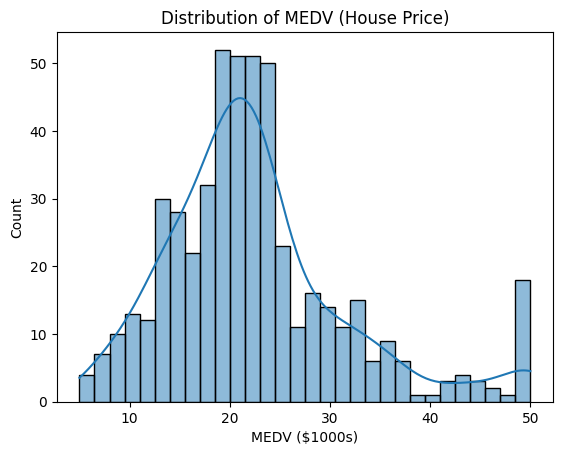

In [4]:
# 시각화

# 상관관계 히트맵
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# 종속변수(MEDV) 분포 시각화
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV (House Price)')
plt.xlabel('MEDV ($1000s)')
plt.show()

#### 변수 선택

In [5]:
# 독립변수, 종속변수 선택

X = df.drop('MEDV', axis=1)  # 독립변수
y = df['MEDV']               # 종속변수

#### 훈련세트, 테스트세트 분할

In [9]:
from sklearn.model_selection import train_test_split

# 80% 훈련, 20% 테스트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 모델 생성 및 훈련

In [10]:
from sklearn.linear_model import LinearRegression

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### 예측 및 평가

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# 예측
y_pred = model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 24.29
R-squared (R2): 0.67


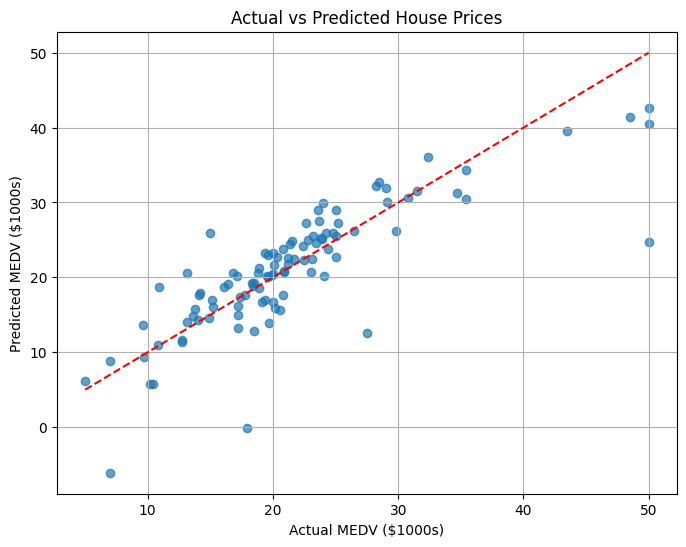

In [12]:
import matplotlib.pyplot as plt

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # 완벽한 예측선
plt.xlabel('Actual MEDV ($1000s)')
plt.ylabel('Predicted MEDV ($1000s)')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()
